In [3]:
import pandas as np
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [4]:
df = pd.read_csv("../data/raw/Student_performance.csv")

## Data exploring

In [5]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
df.shape

(2392, 15)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
 15  Success            2392 non-null   int64  
dtypes: float64(3), int64(13)

In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
sum(df.duplicated())

0

In [9]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [10]:
df['ParentalEducation'].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

In [11]:
df['ParentalSupport'].value_counts()

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

In [48]:
print("\nUnique categories in ParentalSupport:")
print(df['ParentalSupport'].unique())


Unique categories in ParentalSupport:
[2 1 3 4 0]


In [49]:
print("\nUnique categories in ParentalEducation:")
print(df['ParentalEducation'].unique())


Unique categories in ParentalEducation:
[2 1 3 4 0]


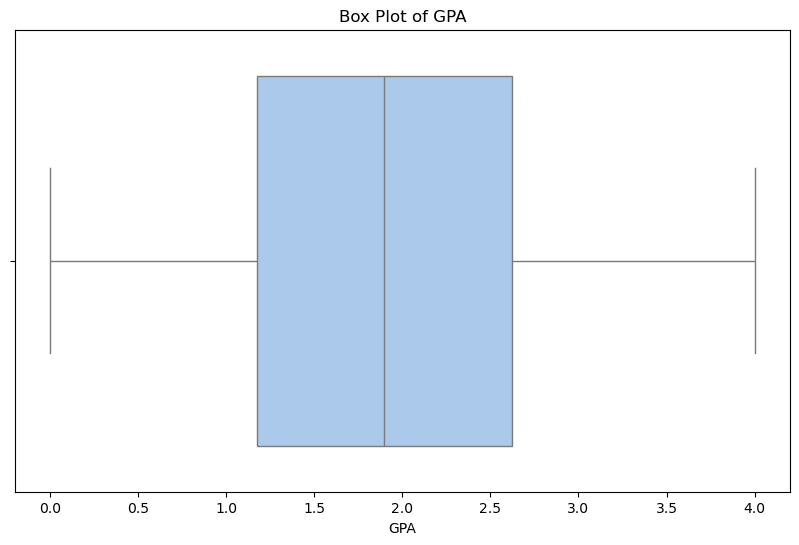

Outliers in the GPA column:
      StudentID       GPA
2          1003  0.112602
18         1019  0.469553
21         1022  0.346894
22         1023  0.312546
32         1033  0.384617
...         ...       ...
2356       3357  0.766257
2366       3367  0.984294
2370       3371  0.569420
2373       3374  0.825020
2378       3379  0.709353

[468 rows x 2 columns]


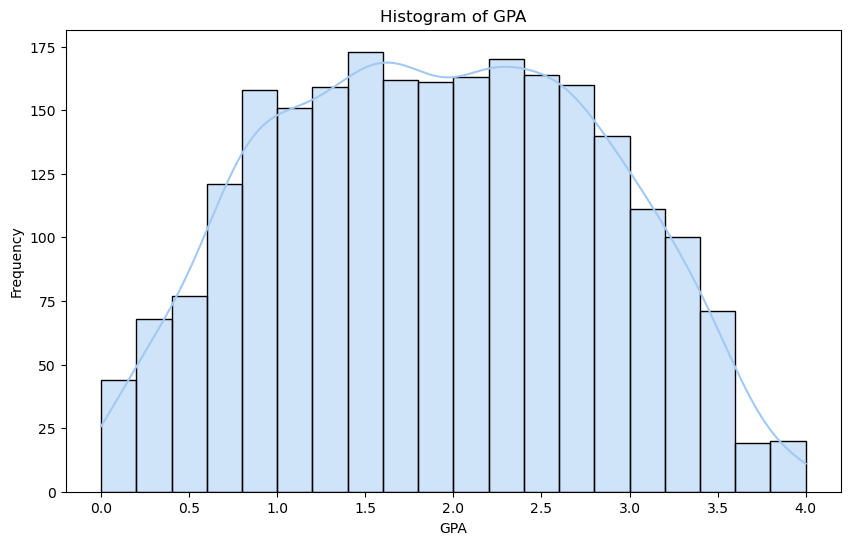

In [47]:
# Visualize GPA distribution with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GPA'])
plt.title('Box Plot of GPA')
plt.xlabel('GPA')
plt.show()

# Identify outliers (GPA < 1.0 or GPA > 4.0)
outliers = df[(df['GPA'] < 1.0) | (df['GPA'] > 4.0)]

# Display outliers
print("Outliers in the GPA column:")
print(outliers[['StudentID', 'GPA']])

# Alternative: Use histograms to view the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['GPA'], bins=20, kde=True)
plt.title('Histogram of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

## Data Cleaning

In [46]:
# Remove missing values

# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values (example: filling with median)
df.fillna(df.median(), inplace=True)

In [13]:
# Verify datatype

df['ParentalSupport'] = df['ParentalSupport'].astype('int')
df['ParentalEducation'] = df['ParentalEducation'].astype('int')
df['GPA'] = df['GPA'].astype('float')
df['GradeClass'] = df['GradeClass'].astype('int')
print(df.dtypes)

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int32
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int32
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int32
dtype: object


In [14]:
# Remove spaces from column names without replacing with an underscore

df.columns = df.columns.str.replace(' ', '')

# Displaying new columns names
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


# Saving data cleaning

In [15]:
df.to_csv("../data/clean/cleaned_Student_performance.csv", index=False)

# EDA


Gender counts and percentages:
        Count  Percentage
Gender                   
0        1170   48.913043
1        1222   51.086957


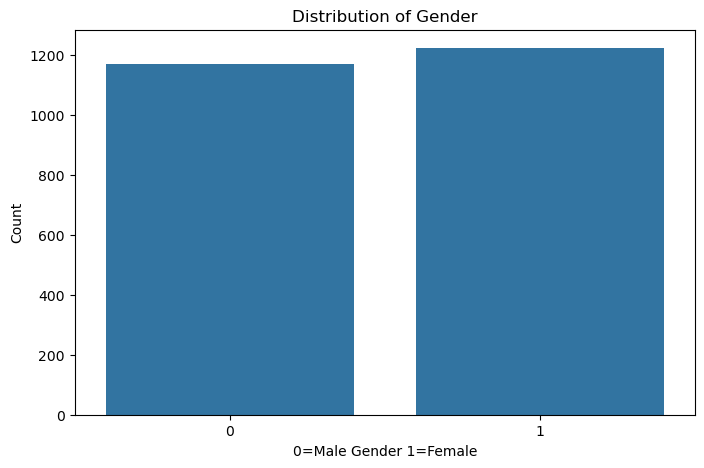

In [16]:
# Number of records
num_records = df.shape[0]

# Count and percentage for Gender
gender_counts = df['Gender'].value_counts().sort_index()
gender_percentages = (gender_counts / num_records) * 100

# Display Gender counts and percentages
print("\nGender counts and percentages:")
print(pd.DataFrame({'Count': gender_counts, 'Percentage': gender_percentages}))

# Plot Gender distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('0=Male Gender 1=Female')
plt.ylabel('Count')
plt.show()


Ethnicity counts and percentages:
           Count  Percentage
Ethnicity                   
0           1207   50.459866
1            493   20.610368
2            470   19.648829
3            222    9.280936


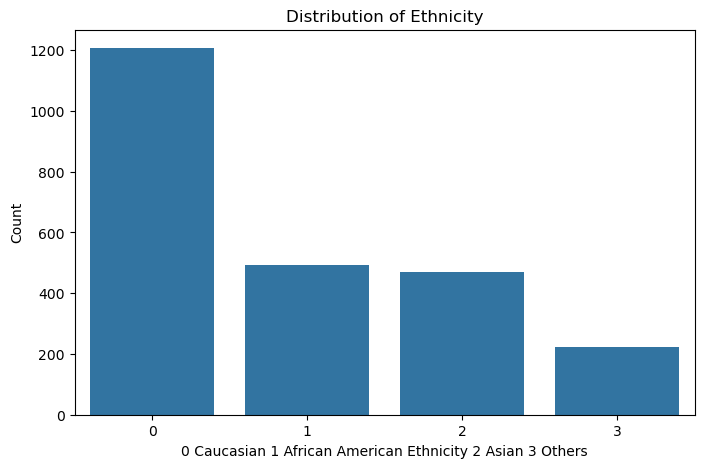

In [17]:
# Count and percentage for Ethnicity
ethnicity_counts = df['Ethnicity'].value_counts().sort_index()
ethnicity_percentages = (ethnicity_counts / num_records) * 100

# Display Ethnicity counts and percentages
print("\nEthnicity counts and percentages:")
print(pd.DataFrame({'Count': ethnicity_counts, 'Percentage': ethnicity_percentages}))

# Plot Ethnicity distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Ethnicity', data=df)
plt.title('Distribution of Ethnicity')
plt.xlabel('0 Caucasian 1 African American Ethnicity 2 Asian 3 Others')
plt.ylabel('Count')
plt.show()


Age counts and percentages:
     Count  Percentage
Age                   
15     630   26.337793
16     593   24.790970
17     587   24.540134
18     582   24.331104


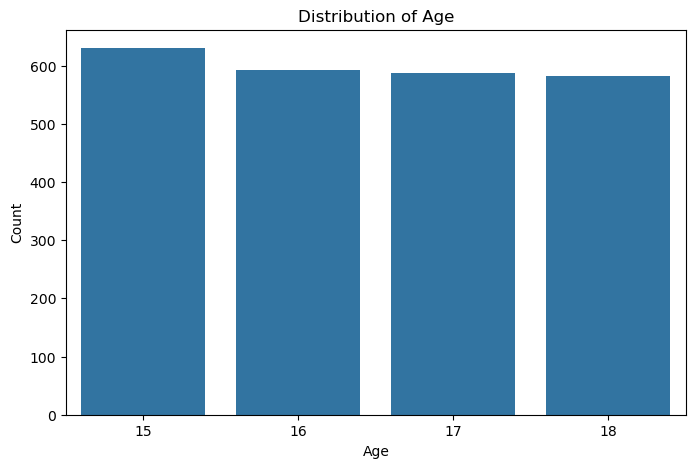

In [18]:
#  Count and percentage for Age
age_counts = df['Age'].value_counts().sort_index()
age_percentages = (age_counts / num_records) * 100

# Display Age counts and percentages
print("\nAge counts and percentages:")
age_df = pd.DataFrame({'Count': age_counts, 'Percentage': age_percentages})
print(age_df)

# Plot Age distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Distribution of Key Variables:
Visualize the distribution of parental support and parental education levels, and haow relate to GPA and gradeclass. 

In [19]:
# Summary of key variables
key_vars = df[['ParentalSupport', 'ParentalEducation', 'GPA', 'GradeClass']]
print("\nSummary statistics for key variables:")
print(key_vars.describe())


Summary statistics for key variables:
       ParentalSupport  ParentalEducation          GPA   GradeClass
count      2392.000000        2392.000000  2392.000000  2392.000000
mean          2.122074           1.746237     1.906186     2.983696
std           1.122813           1.000411     0.915156     1.233908
min           0.000000           0.000000     0.000000     0.000000
25%           1.000000           1.000000     1.174803     2.000000
50%           2.000000           2.000000     1.893393     4.000000
75%           3.000000           2.000000     2.622216     4.000000
max           4.000000           4.000000     4.000000     4.000000


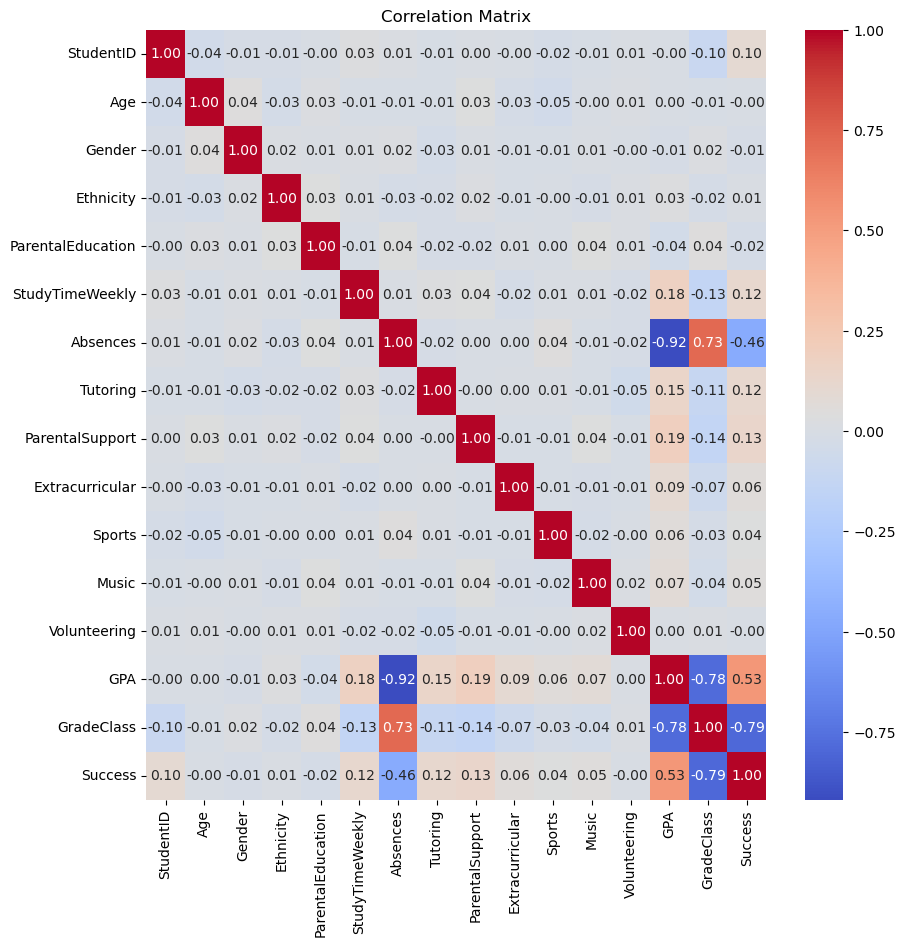

In [44]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Distribution of parental support and education levels

In [20]:
# Set a new palette for the plots
sns.set_palette("pastel")

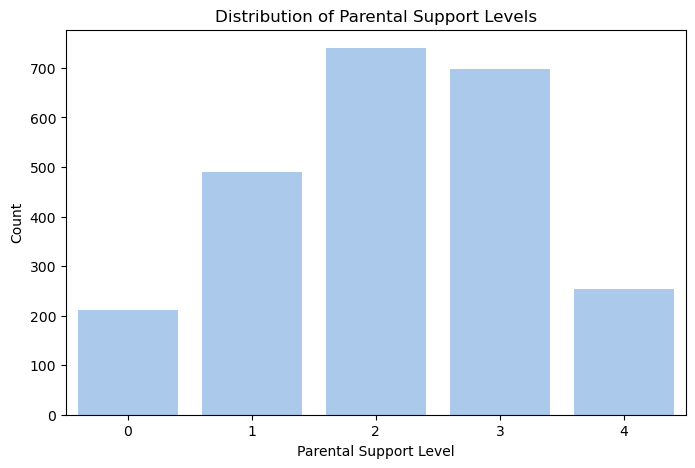


ParentalSupport value counts:
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64


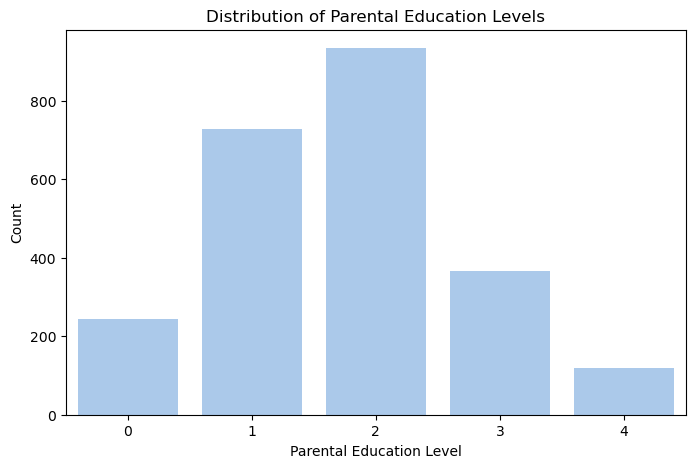


ParentalEducation value counts:
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64


In [21]:
# ParentalSupport distribution
plt.figure(figsize=(8,5))
sns.countplot(x='ParentalSupport', data=df)
plt.title('Distribution of Parental Support Levels')
plt.xlabel('Parental Support Level')
plt.ylabel('Count')
plt.show()
print(f"\nParentalSupport value counts:\n{df['ParentalSupport'].value_counts()}")

# ParentalEducation distribution
plt.figure(figsize=(8,5))
sns.countplot(x='ParentalEducation', data=df)
plt.title('Distribution of Parental Education Levels')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.show()
print(f"\nParentalEducation value counts:\n{df['ParentalEducation'].value_counts()}")

## GPA Analysis
Analize the distribution of GPA and its relationship with parental support and parental education

## Boxplot showing relationship between parental support , parental education and GPA

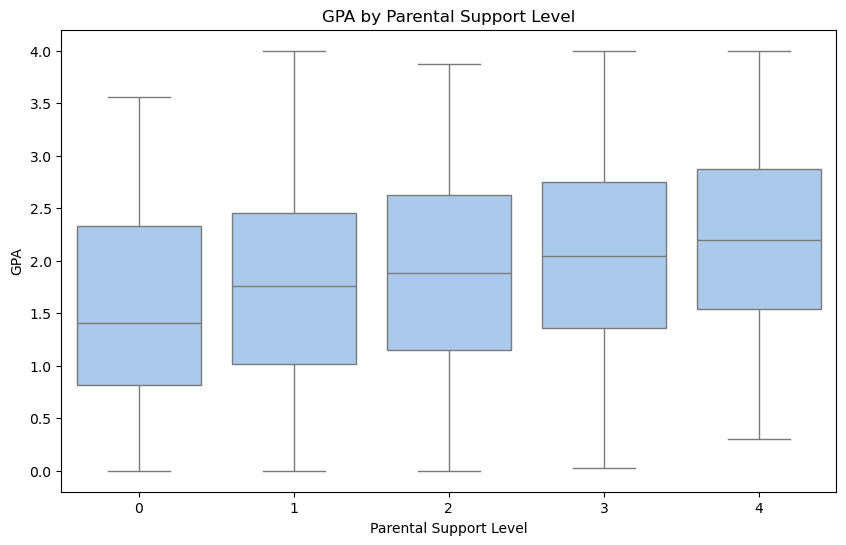

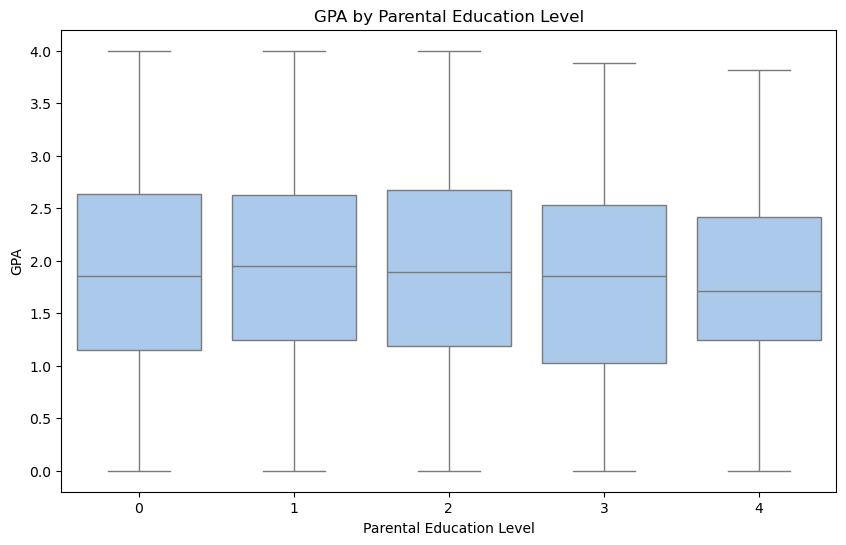


Average GPA by Parental Support Level:
   Parental Support Level  Average GPA
0                       0     1.540128
1                       1     1.755700
2                       2     1.884246
3                       3     2.042409
4                       4     2.191545


In [22]:
# Box plot to show relation between ParentalSupport and GPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalSupport', y='GPA', data=df)
plt.title('GPA by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('GPA')
plt.show()

# Box plot to show relation between ParentalEducation and GPA
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalEducation', y='GPA', data=df)
plt.title('GPA by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('GPA')
plt.show()

# Calculate and print the average GPA by Parental Support Level
average_gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean().reset_index()
average_gpa_by_support.columns = ['Parental Support Level', 'Average GPA']  # Rename columns for clarity
print("\nAverage GPA by Parental Support Level:")
print(average_gpa_by_support)

# Save the average GPA by Parental Support Level to a CSV file
average_gpa_by_support.to_csv('../data/clean/average_gpa_by_parental_support.csv', index=False)

## Grade class distribution
Analyze the distribution of grade class and its relationship with parental support and parental education

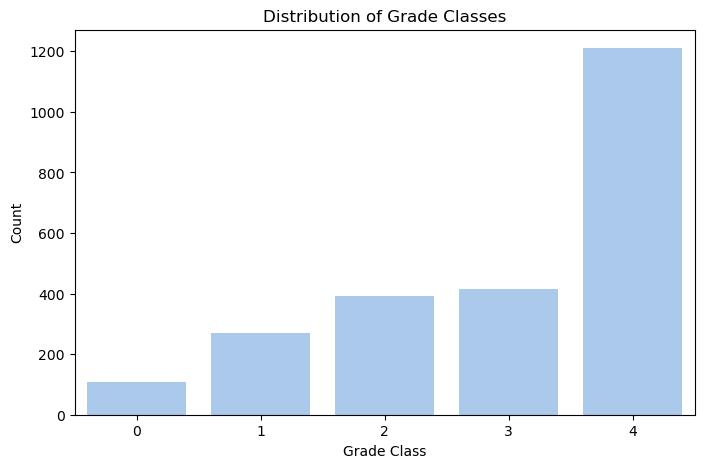


GradeClass value counts:
GradeClass
4    1211
3     414
2     391
1     269
0     107
Name: count, dtype: int64



In [23]:
# Count plot for GradeClass distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='GradeClass', data=df)
plt.title('Distribution of Grade Classes')
plt.xlabel('Grade Class')
plt.ylabel('Count')
plt.show()

print(f"\nGradeClass value counts:\n{df['GradeClass'].value_counts()}\n")



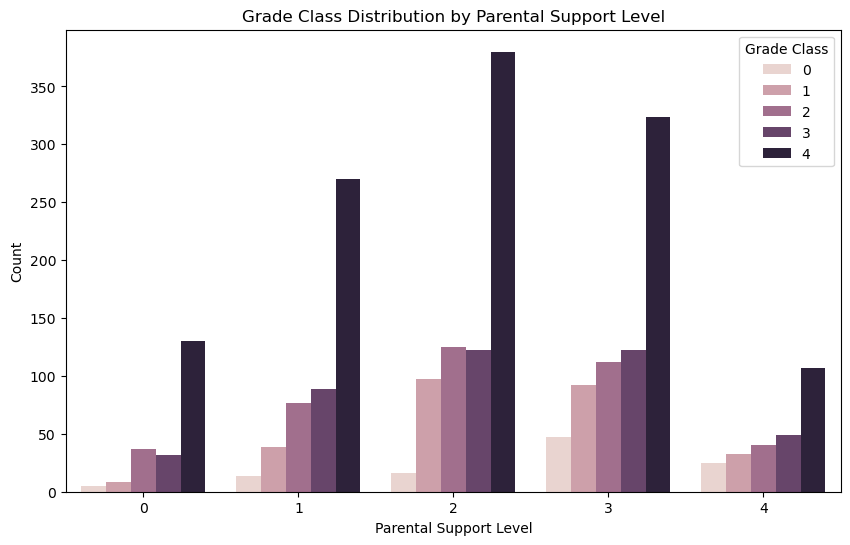


Average Grade Distribution by Parental Support Level:
GradeClass              0          1          2          3          4
ParentalSupport                                                      
0                2.358491   3.773585  17.452830  15.094340  61.320755
1                2.862986   7.975460  15.746421  18.200409  55.214724
2                2.162162  13.108108  16.891892  16.486486  51.351351
3                6.743185  13.199426  16.068867  17.503587  46.484935
4                9.842520  12.992126  15.748031  19.291339  42.125984


In [24]:
# Count plot of GradeClass by ParentalSupport
plt.figure(figsize=(10, 6))
sns.countplot(x='ParentalSupport', hue='GradeClass', data=df)
plt.title('Grade Class Distribution by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Count')
plt.legend(title='Grade Class', loc='upper right')
plt.show()

# Calculate the average grade distribution by Parental Support Level
print("\nAverage Grade Distribution by Parental Support Level:")
support_grade_distribution = df.groupby(['ParentalSupport', 'GradeClass']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Print the distribution for review
print(support_grade_distribution)

# Save the grade distribution by Parental Support Level to a CSV file
support_grade_distribution.to_csv('../data/clean/gradeclass_support.csv', index=True)  # Note index=True to keep ParentalSupport in the file

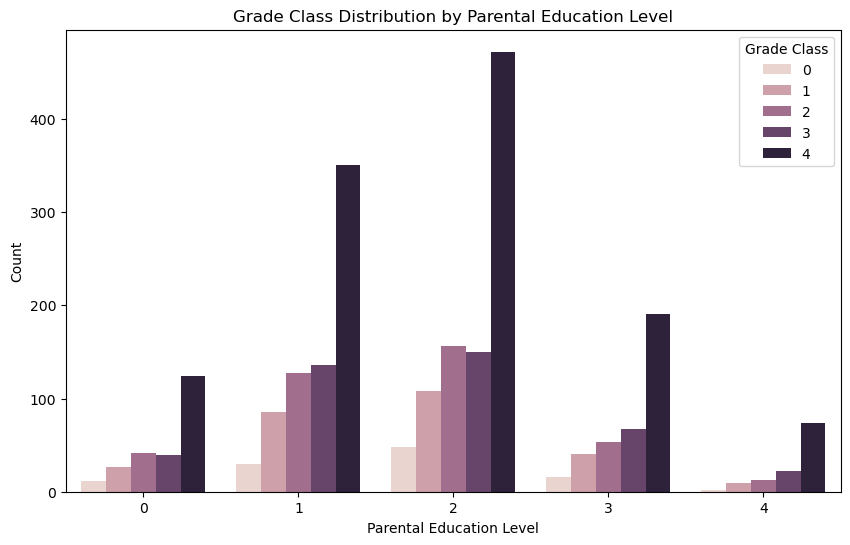


Average Grade Distribution by Parental Education Level:
GradeClass                0          1          2          3          4
ParentalEducation                                                      
0                  4.526749  11.111111  17.283951  16.049383  51.028807
1                  4.120879  11.675824  17.445055  18.681319  48.076923
2                  5.139186  11.563169  16.702355  16.059957  50.535332
3                  4.359673  10.899183  14.441417  18.256131  52.043597
4                  1.666667   7.500000  10.833333  18.333333  61.666667


In [25]:
# Count plot of GradeClass by ParentalEducation
plt.figure(figsize=(10, 6))
sns.countplot(x='ParentalEducation', hue='GradeClass', data=df)
plt.title('Grade Class Distribution by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.legend(title='Grade Class', loc='upper right')
plt.show()

# Calculate the average grade distribution by Parental Education Level
print("\nAverage Grade Distribution by Parental Education Level:")
education_grade_distribution = df.groupby(['ParentalEducation', 'GradeClass']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Print the distribution for review
print(education_grade_distribution)

# Save the grade distribution by Parental Education Level to a CSV file
education_grade_distribution.to_csv('../data/clean/gradeclass_education.csv', index=True)  # Note index=True to keep ParentalEducation in the file

In [26]:
import pandas as pd

# Summary statistics for key variables
summary_stats = {
    "ParentalSupport": [2392.0, 2.122074, 1.122813, 0.0, 1.0, 2.0, 3.0, 4.0],
    "ParentalEducation": [2392.0, 1.746237, 1.000411, 0.0, 1.0, 2.0, 2.0, 4.0],
    "GPA": [2392.0, 1.906186, 0.915156, 0.0, 1.174803, 1.893393, 2.622216, 4.0],
    "GradeClass": [2392.0, 2.983696, 1.233908, 0.0, 2.0, 4.0, 4.0, 4.0]
}
summary_df = pd.DataFrame(summary_stats, index=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])
print("Summary statistics for key variables:")
print(summary_df)

# ParentalSupport value counts
parental_support_counts = df['ParentalSupport'].value_counts().sort_index()
print("\nParentalSupport value counts:")
print(parental_support_counts)

# ParentalEducation value counts
parental_education_counts = df['ParentalEducation'].value_counts().sort_index()
print("\nParentalEducation value counts:")
print(parental_education_counts)

# Summary statistics for GPA
gpa_summary_stats = df['GPA'].describe()
print("\nSummary statistics for GPA:")
print(gpa_summary_stats)

# Average GPA by Parental Support Level
average_gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean()
print("\nAverage GPA by Parental Support Level:")
print(average_gpa_by_support)

# GradeClass value counts
gradeclass_counts = df['GradeClass'].value_counts().sort_index()
print("\nGradeClass value counts:")
print(gradeclass_counts)

# Average Grade Distribution by Parental Support Level
support_grade_distribution = df.groupby(['ParentalSupport', 'GradeClass']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
print("\nAverage Grade Distribution by Parental Support Level:")
print(support_grade_distribution)

# Average Grade Distribution by Parental Education Level
education_grade_distribution = df.groupby(['ParentalEducation', 'GradeClass']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
print("\nAverage Grade Distribution by Parental Education Level:")
print(education_grade_distribution)

Summary statistics for key variables:
       ParentalSupport  ParentalEducation          GPA   GradeClass
count      2392.000000        2392.000000  2392.000000  2392.000000
mean          2.122074           1.746237     1.906186     2.983696
std           1.122813           1.000411     0.915156     1.233908
min           0.000000           0.000000     0.000000     0.000000
25%           1.000000           1.000000     1.174803     2.000000
50%           2.000000           2.000000     1.893393     4.000000
75%           3.000000           2.000000     2.622216     4.000000
max           4.000000           4.000000     4.000000     4.000000

ParentalSupport value counts:
ParentalSupport
0    212
1    489
2    740
3    697
4    254
Name: count, dtype: int64

ParentalEducation value counts:
ParentalEducation
0    243
1    728
2    934
3    367
4    120
Name: count, dtype: int64

Summary statistics for GPA:
count    2392.000000
mean        1.906186
std         0.915156
min         0.0000

# Additional EDA

## Impact of combined parental support and education on GPA. 

ParentalEducation         0         1         2         3         4
ParentalSupport                                                    
0                  1.509600  1.651207  1.674877  1.222052  1.147971
1                  1.682445  1.805624  1.766580  1.698426  1.714893
2                  1.903598  1.941202  1.877234  1.764527  1.938332
3                  2.038138  2.008491  2.097840  2.040177  1.860687
4                  2.314265  2.240571  2.125438  2.199859  2.339437


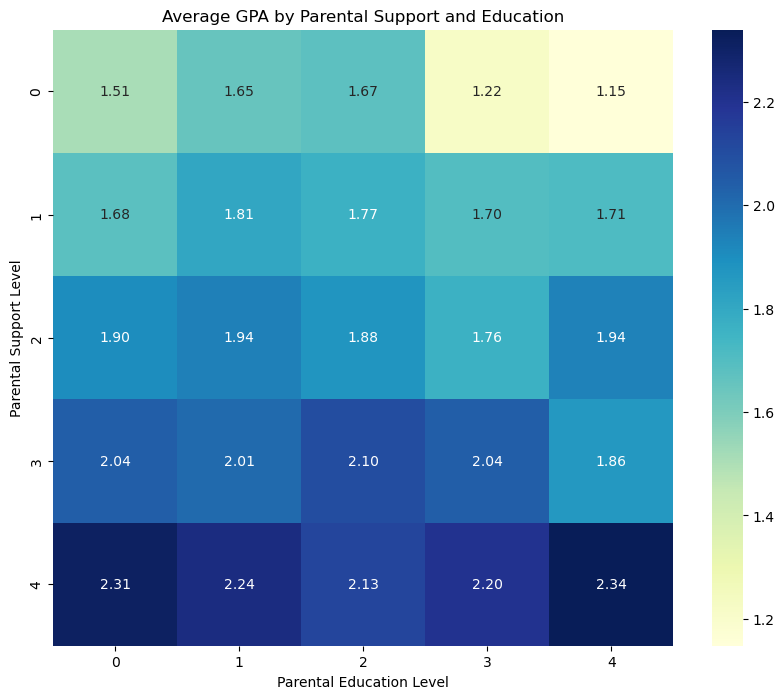

In [27]:
pivot_table = pd.pivot_table(df, values='GPA', 
                               index='ParentalSupport', 
                               columns='ParentalEducation', 
                               aggfunc='mean')
print(pivot_table)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average GPA by Parental Support and Education')
plt.xlabel('Parental Education Level')
plt.ylabel('Parental Support Level')
plt.show()

## Analyze:
Significance of parental involvement parental support is a significant factor influencing student GPA and 
its positive effects are compounded by parent's education level. 

## Distribution of GPA Across Demographics
Analyze the distribution of GPA and GradeClass across gender and ethnic groups, segmented by parental support and education levels.

In [28]:
# For gender
avg_gpa_gender = df.groupby('Gender')['GPA'].mean()
print(avg_gpa_gender)

# For ethnicity
avg_gpa_ethnicity = df.groupby('Ethnicity')['GPA'].mean()
print(avg_gpa_ethnicity)

# For segmented analysis by parental support
gpa_by_gender_support = df.groupby(['Gender', 'ParentalSupport'])['GPA'].mean().unstack()
gpa_by_ethnicity_support = df.groupby(['Ethnicity', 'ParentalSupport'])['GPA'].mean().unstack()

Gender
0    1.918679
1    1.894225
Name: GPA, dtype: float64
Ethnicity
0    1.875905
1    1.946437
2    1.922125
3    1.947696
Name: GPA, dtype: float64


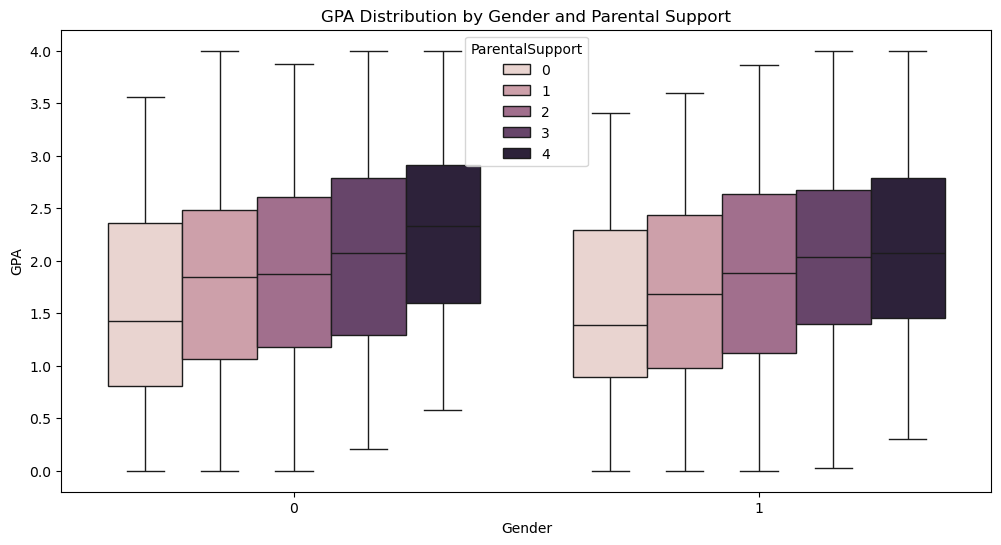

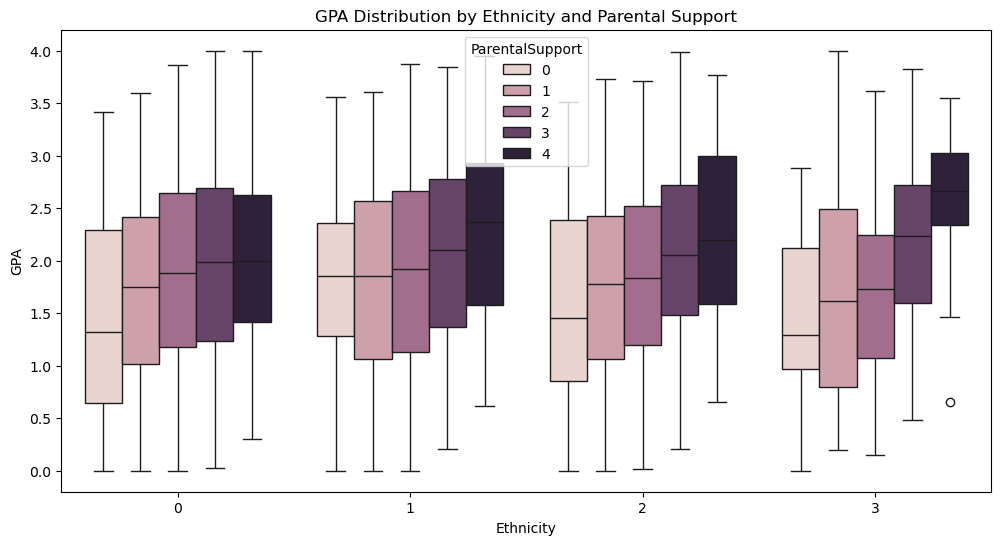

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='GPA', hue='ParentalSupport', data=df)
plt.title('GPA Distribution by Gender and Parental Support')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Ethnicity', y='GPA', hue='ParentalSupport', data=df)
plt.title('GPA Distribution by Ethnicity and Parental Support')
plt.show()

## Predict GPA Using Parental Factors
Assess how Parental Support and Parental Education predict GPA.

In [30]:
# RUN A MULTIPLE LINEAR REGRESSION
#  See how the interaction between ParentalSupport and ParentalEducation affects GPA.

# Prepare the data
# X = df[['ParentalSupport', 'ParentalEducation']]
#X = sm.add_constant(X)  # Adds a constant term to the predictor
#y = df['GPA']

# Fit the model
#model = sm.OLS(y, X).fit()

# Print the summary
#print(model.summary())

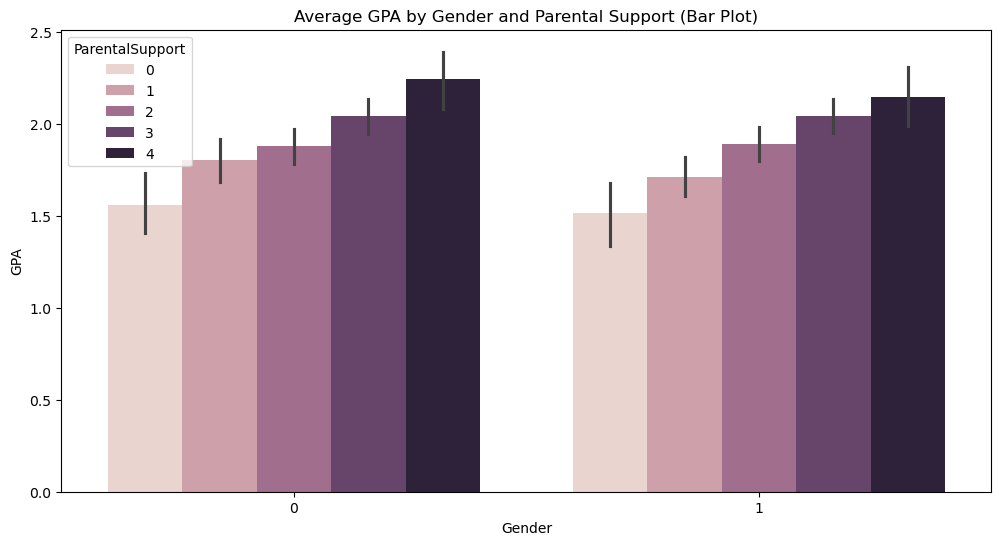

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='GPA', hue='ParentalSupport', data=df)
plt.title('Average GPA by Gender and Parental Support (Bar Plot)')
plt.show()

# KPIs

## 1. Success rate :  % students with high grades accros parental support levels

Success Rate (A/B Grades) by Parental Support Level (%):
ParentalSupport
0     6.132075
1    10.838446
2    15.270270
3    19.942611
4    22.834646
dtype: float64


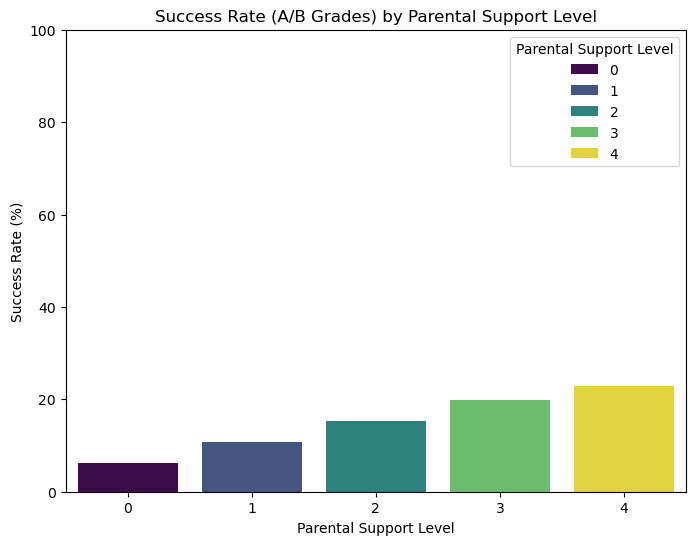

In [32]:
# Filter for high grades (A and B)
high_grades = df[df['GradeClass'].isin([0, 1])]

# Calculate success rate by Parental Support Level
success_rate = high_grades.groupby('ParentalSupport').size() / df.groupby('ParentalSupport').size() * 100

# Print the success rate
print("Success Rate (A/B Grades) by Parental Support Level (%):")
print(success_rate)

# Save the success rate to a DataFrame and then to a CSV file
success_rate_df = success_rate.reset_index(name='Success Rate (%)')  # Create a DataFrame with the success rate
success_rate_df.columns = ['Parental Support Level', 'Success Rate (%)']  # Rename columns for clarity
success_rate_df.to_csv('success_rate_by_parental_support.csv', index=False)  # Save to CSV file

# Visualization: Bar plot for success rate by parental support level
plt.figure(figsize=(8, 6))
# Use hue parameter for coloring
sns.barplot(x=success_rate.index, y=success_rate.values, hue=success_rate.index, dodge=False, palette='viridis')
plt.title('Success Rate (A/B Grades) by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Success Rate (%)')
plt.xticks(ticks=range(len(success_rate.index)), labels=success_rate.index)  # Set x-tick labels
plt.ylim(0, 100)  # Set y-axis to 0-100 for percentage
plt.legend(title='Parental Support Level')
plt.show()

## Analyze:
Students with the highest level of parental support (level 4) have a success rate of 22.83%, 
compared to only 6.13% for students with no parental support (level 0).

## 2. Failure rate: Proportion students failing grade classe = 4 by parental education level

Failure Rate (Grade Class = 4) by Parental Education Level (%):
ParentalEducation
0    51.028807
1    48.076923
2    50.535332
3    52.043597
4    61.666667
dtype: float64


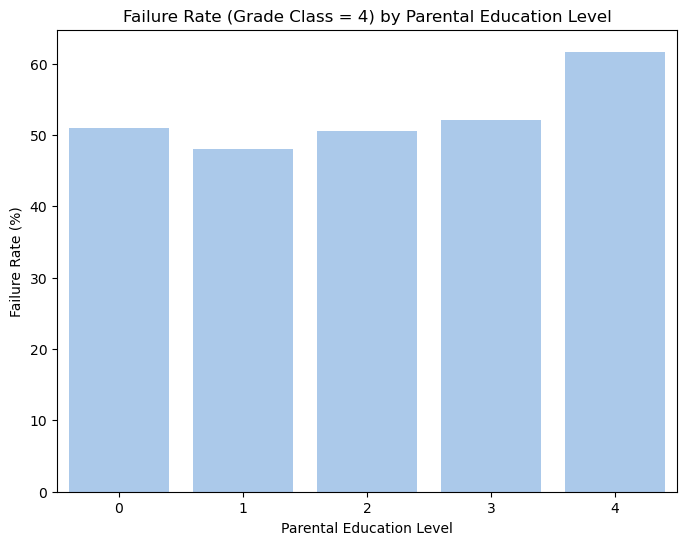

In [33]:
# Filter for failing students (Grade Class = 4)
failing_students = df[df['GradeClass'] == 4]

# Calculate failure rate by Parental Education Level
failure_rate = failing_students.groupby('ParentalEducation').size() / df.groupby('ParentalEducation').size() * 100

# Print the failure rate
print("Failure Rate (Grade Class = 4) by Parental Education Level (%):")
print(failure_rate)

# Save the failure rate to a DataFrame and then to a CSV file
failure_rate_df = failure_rate.reset_index(name='Failure Rate (%)')  # Create a DataFrame with the failure rate
failure_rate_df.columns = ['Parental Education Level', 'Failure Rate (%)']  # Rename columns for clarity
failure_rate_df.to_csv('../data/clean/failure_rate_by_parental_education.csv', index=False)  # Save to CSV file

# Visualization: Bar plot for failure rate by parental education level
plt.figure(figsize=(8, 6))
sns.barplot(x=failure_rate.index, y=failure_rate.values)  # Using index for x-axis and values for y-axis
plt.title('Failure Rate (Grade Class = 4) by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Failure Rate (%)')
plt.xticks(ticks=range(len(failure_rate.index)), labels=failure_rate.index)  # Set x-tick labels
plt.show()

## Analyze:
Students whose parents have the highest education level (level 4) have a failure rate of 61.67%, 
which is significantly higher than students with lower parental education levels.

## 3. Improvement margins: GPA difference between students with low and high parental support

GPA Improvement Margin between Low and High Parental Support:
Improvement Margin: 0.39
GPA Increment: 0.39 points
Percentage Increase: 9.75%


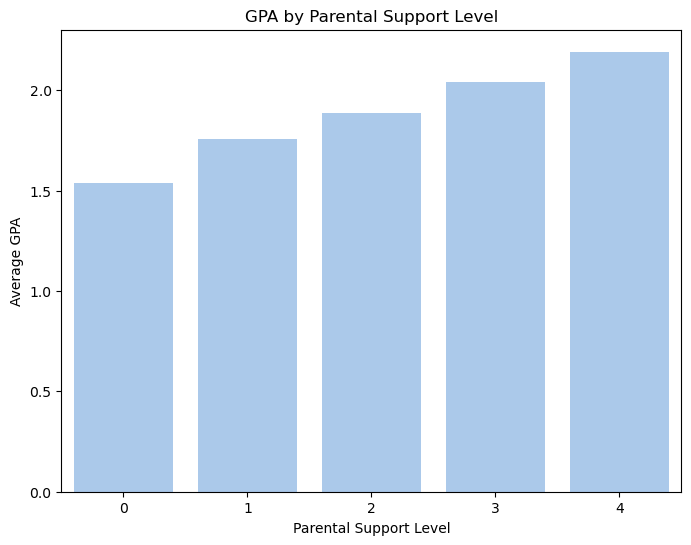

In [34]:
# Calculate average GPA for low and high parental support levels
low_support_gpa = df[df['ParentalSupport'].isin([0, 1])]['GPA'].mean()
high_support_gpa = df[df['ParentalSupport'].isin([3, 4])]['GPA'].mean()

# Calculate the improvement margin
improvement_margin = high_support_gpa - low_support_gpa
print("GPA Improvement Margin between Low and High Parental Support:")
print(f"Improvement Margin: {improvement_margin:.2f}")

# Define the GPA increment and base GPA
gpa_increment = 0.39
base_gpa = 4.0  # You can change this value to the average GPA of your group

# Calculate the percentage increase
percentage_increase = (gpa_increment / base_gpa) * 100

# Print out the results
print(f"GPA Increment: {gpa_increment} points")
print(f"Percentage Increase: {percentage_increase:.2f}%")

# Prepare the data for saving
gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean()

# Create a DataFrame for saving
gpa_support_df = gpa_by_support.reset_index(name='Average GPA')
gpa_support_df.columns = ['Parental Support Level', 'Average GPA']  # Rename columns for clarity

# Save the GPA data by parental support level to a CSV file
gpa_support_df.to_csv('../data/clean/gpa_by_parental_support.csv', index=False)

# Visualization: Bar plot for GPA by parental support level
plt.figure(figsize=(8, 6))
sns.barplot(x=gpa_by_support.index, y=gpa_by_support.values)
plt.title('GPA by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Average GPA')
plt.xticks(ticks=range(len(gpa_by_support.index)), labels=gpa_by_support.index)  # Set x-tick labels
plt.show()

# A/B Testing

## Hypothesis 1: Effect of parental support on student success

define groups,
calculate succes rates,
perform two proportion z-test

Statistic: -5.453570725935711
p-value: 4.936829739033417e-08
Hypothesis 1 - Parental Support:
Control Group (Low Parental Support): 1441 students
Test Group (High Parental Support): 951 students


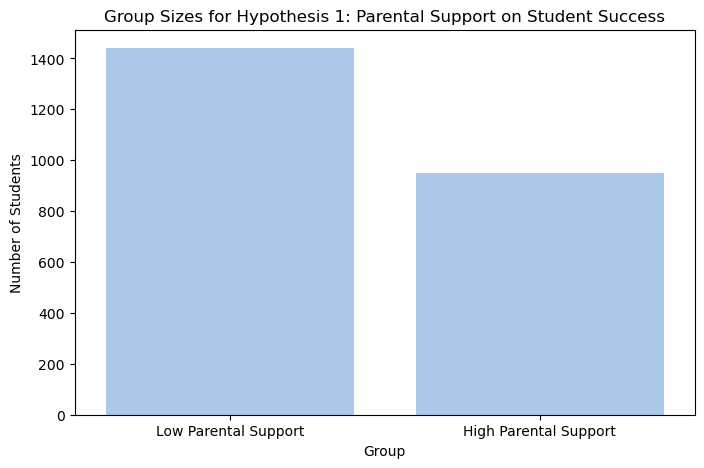

In [35]:
from statsmodels.stats.proportion import proportions_ztest

# Define success as GradeClass 0 or 1 (A/B grades)
df['Success'] = df['GradeClass'].apply(lambda x: 1 if x in [0, 1] else 0)

# Define groups
low_support = df[df['ParentalSupport'] <= 2]
high_support = df[df['ParentalSupport'] > 2]

# Calculate success counts
success_low = low_support['Success'].sum()
total_low = low_support['Success'].count()
success_high = high_support['Success'].sum()
total_high = high_support['Success'].count()

# Perform two-proportion z-test
count = np.array([success_low, success_high])
nobs = np.array([total_low, total_high])
stat, p_value = proportions_ztest(count, nobs) # H0: propotion_success = proportion_not_succcess

# Print the results
print('Statistic:', stat)
print('p-value:', p_value)

# Print group sizes for hypothesis
low_support_size = low_support.shape[0]
high_support_size = high_support.shape[0]

print(f"Hypothesis 1 - Parental Support:")
print(f"Control Group (Low Parental Support): {low_support_size} students")
print(f"Test Group (High Parental Support): {high_support_size} students")

# Save results to a DataFrame for output
results_df = pd.DataFrame({
    'Group': ['Low Parental Support', 'High Parental Support'],
    'Success Count': [success_low, success_high],
    'Total Count': [total_low, total_high],
    'Group Size': [low_support_size, high_support_size],
    'Statistic': [stat, None],  # None for high support as it's not applicable
    'p-value': [p_value, None]   # None for high support as it's not applicable
})

# Save the DataFrame to CSV
results_df.to_csv('../data/clean/success_analysis_results.csv', index=False)

# Visualization: Bar plot for group sizes
plt.figure(figsize=(8, 5))
sns.barplot(x=['Low Parental Support', 'High Parental Support'], y=[low_support_size, high_support_size])
plt.title('Group Sizes for Hypothesis 1: Parental Support on Student Success')
plt.xlabel('Group')
plt.ylabel('Number of Students')
plt.show()

## Hypothesis 2: Failure rate by parental education

Statistic: -1.873426373863564
p-value: 0.061009530897137745

Hypothesis 2 - Parental Education:
Control Group (Low Parental Education): 1905 students
Test Group (High Parental Education): 487 students


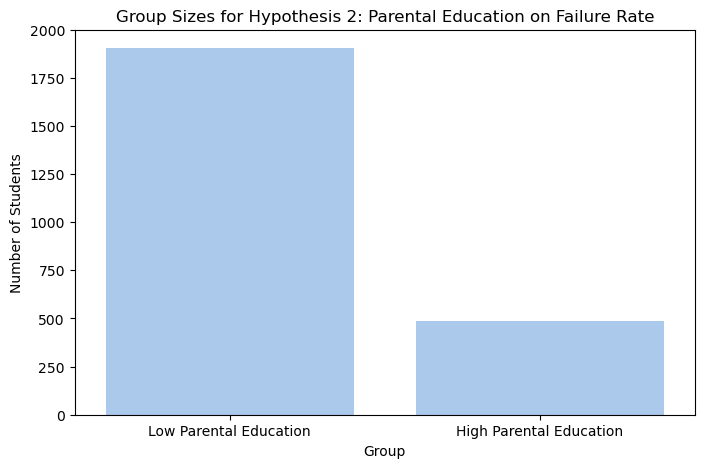

In [36]:
# Define failure as GradeClass 4
df['Failure'] = df['GradeClass'].apply(lambda x: 1 if x == 4 else 0)

# Define groups
low_education = df[df['ParentalEducation'] <= 2]
high_education = df[df['ParentalEducation'] > 2]

# Calculate failure counts
failure_low = low_education['Failure'].sum()
total_low_edu = low_education['Failure'].count()
failure_high = high_education['Failure'].sum()
total_high_edu = high_education['Failure'].count()

# Perform two-proportion z-test
count = np.array([failure_low, failure_high])
nobs = np.array([total_low_edu, total_high_edu])
stat, p_value = proportions_ztest(count, nobs) # H0: proportion_failure_low = proportion_failure_high

# Print the results
print('Statistic:', stat)
print('p-value:', p_value)

# Hypothesis 2: Failure Rate and Parental Education
low_education_size = low_education.shape[0]
high_education_size = high_education.shape[0]

print(f"\nHypothesis 2 - Parental Education:")
print(f"Control Group (Low Parental Education): {low_education_size} students")
print(f"Test Group (High Parental Education): {high_education_size} students")

# Save results to a DataFrame for output
results_df = pd.DataFrame({
    'Group': ['Low Parental Education', 'High Parental Education'],
    'Failure Count': [failure_low, failure_high],
    'Total Count': [total_low_edu, total_high_edu],
    'Group Size': [low_education_size, high_education_size],
    'Statistic': [stat, None],  # None for high education as it's not applicable
    'p-value': [p_value, None]   # None for high education as it's not applicable
})

# Save the DataFrame to CSV
results_df.to_csv('../data/clean/failure_analysis_results.csv', index=False)

# Visualization: Bar plot for group sizes
plt.figure(figsize=(8, 5))
sns.barplot(x=['Low Parental Education', 'High Parental Education'], y=[low_education_size, high_education_size])
plt.title('Group Sizes for Hypothesis 2: Parental Education on Failure Rate')
plt.xlabel('Group')
plt.ylabel('Number of Students')
plt.show()

## Hypothesis 3: Combined effect of parental support and education on GPA

Statistic: -3.2989413013015856
p-value: 0.001111197446797198

Hypothesis 3 - Combined Effect of Parental Support and Education:
Control Group (Low Parental Support and Education): 1134 students
Test Group (High Parental Support and Education): 180 students


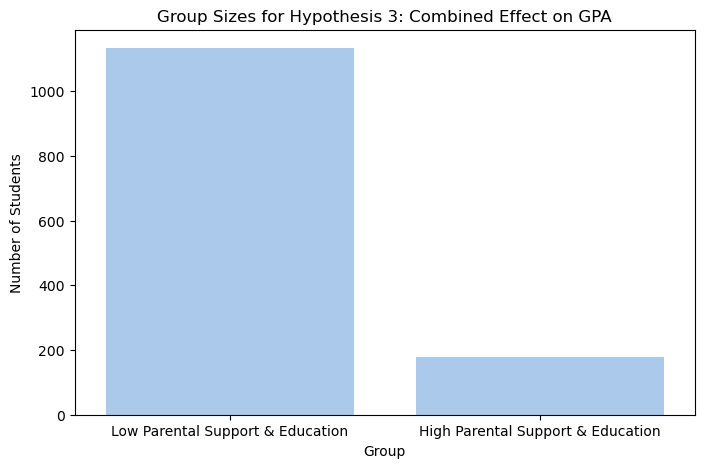

In [37]:
# Define groups
low_support_edu = df[(df['ParentalSupport'] <= 2) & (df['ParentalEducation'] <= 2)]
high_support_edu = df[(df['ParentalSupport'] > 2) & (df['ParentalEducation'] > 2)]

# Extract GPAs
gpa_low_support_edu = low_support_edu['GPA']
gpa_high_support_edu = high_support_edu['GPA']

# Perform independent t-test
stat, p_value = ttest_ind(gpa_low_support_edu, gpa_high_support_edu, equal_var=False)

# Print the test statistic and p-value
print('Statistic:', stat)
print('p-value:', p_value)

# Hypothesis 3: Combined Effect of Parental Support and Education on GPA
low_support_edu_size = low_support_edu.shape[0]
high_support_edu_size = high_support_edu.shape[0]

print(f"\nHypothesis 3 - Combined Effect of Parental Support and Education:")
print(f"Control Group (Low Parental Support and Education): {low_support_edu_size} students")
print(f"Test Group (High Parental Support and Education): {high_support_edu_size} students")

# Save results to a DataFrame for output
results_df = pd.DataFrame({
    'Group': ['Low Parental Support & Education', 'High Parental Support & Education'],
    'Group Size': [low_support_edu_size, high_support_edu_size],
    'Statistic': [stat, None],  # None for high support as it's not applicable
    'p-value': [p_value, None]   # None for high support as it's not applicable
})

# Save the DataFrame to CSV
results_df.to_csv('../data/clean/hypothesis_3_analysis_results.csv', index=False)

# Visualization: Bar plot for group sizes
plt.figure(figsize=(8, 5))
sns.barplot(x=['Low Parental Support & Education', 'High Parental Support & Education'], y=[low_support_edu_size, high_support_edu_size])
plt.title('Group Sizes for Hypothesis 3: Combined Effect on GPA')
plt.xlabel('Group')
plt.ylabel('Number of Students')
plt.show()

In [38]:
def flag_p_value(p_value):
    """Flag p-value with stars based on significance level.
    
    Args:
        p_value (float): The p-value to evaluate.
    
    Returns:
        str: A formatted string with p-value and stars.
    """
    # Format the p-value with three decimal places
    formatted_p_value = f"{p_value:.3f}"
    
    # Determine significance level and add stars
    if p_value < 0.001:
        return f"{formatted_p_value} ***"
    elif p_value < 0.01:
        return f"{formatted_p_value} **"
    elif p_value < 0.05:
        return f"{formatted_p_value} *"
    else:
        return formatted_p_value

# Example usage
p_values = [0.0504324531978422, 0.0495340384925377, 0.0004326985, 0.009876543]
flagged_p_values = [flag_p_value(p) for p in p_values]

# Print results
for original, flagged in zip(p_values, flagged_p_values):
    print(f"Original p-value: {original}, Flagged: {flagged}")

Original p-value: 0.0504324531978422, Flagged: 0.050
Original p-value: 0.0495340384925377, Flagged: 0.050 *
Original p-value: 0.0004326985, Flagged: 0.000 ***
Original p-value: 0.009876543, Flagged: 0.010 **


Statistic: -5.453570725935711
p-value: 0.000 ***
Hypothesis 1 - Parental Support:
Control Group (Low Parental Support): 1441 students
Test Group (High Parental Support): 951 students


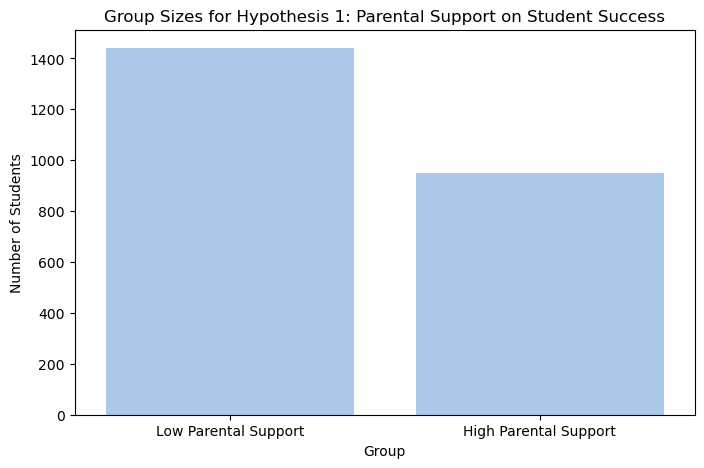

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load dataset
df = pd.read_csv('../data/raw/Student_performance.csv')

# Define the function to flag p-values
def flag_p_value(p_value):
    """Flag p-value with stars based on significance level."""
    formatted_p_value = f"{p_value:.3f}"
    if p_value < 0.001:
        return f"{formatted_p_value} ***"
    elif p_value < 0.01:
        return f"{formatted_p_value} **"
    elif p_value < 0.05:
        return f"{formatted_p_value} *"
    else:
        return formatted_p_value

# Define success as GradeClass 0 or 1 (A/B grades)
df['Success'] = df['GradeClass'].apply(lambda x: 1 if x in [0, 1] else 0)

# Define groups
low_support = df[df['ParentalSupport'] <= 2]
high_support = df[df['ParentalSupport'] > 2]

# Calculate success counts
success_low = low_support['Success'].sum()
total_low = low_support['Success'].count()
success_high = high_support['Success'].sum()
total_high = high_support['Success'].count()

# Perform two-proportion z-test
count = np.array([success_low, success_high])
nobs = np.array([total_low, total_high])
stat, p_value = proportions_ztest(count, nobs) # H0: propotion_success = proportion_not_success

# Flag the p-value
flagged_p_value = flag_p_value(p_value)

# Print the results
print('Statistic:', stat)
print('p-value:', flagged_p_value)

# Print group sizes for hypothesis
low_support_size = low_support.shape[0]
high_support_size = high_support.shape[0]

print(f"Hypothesis 1 - Parental Support:")
print(f"Control Group (Low Parental Support): {low_support_size} students")
print(f"Test Group (High Parental Support): {high_support_size} students")

# Save results to a DataFrame for output
results_df = pd.DataFrame({
    'Group': ['Low Parental Support', 'High Parental Support'],
    'Success Count': [success_low, success_high],
    'Total Count': [total_low, total_high],
    'Group Size': [low_support_size, high_support_size],
    'Statistic': [stat, None],  # None for high support as it's not applicable
    'p-value': [flagged_p_value, None]   # Flagged p-value for the low support group only
})

# Save the DataFrame to CSV
results_df.to_csv('../data/clean/success_analysis_results.csv', index=False)

# Visualization: Bar plot for group sizes
plt.figure(figsize=(8, 5))
sns.barplot(x=['Low Parental Support', 'High Parental Support'], y=[low_support_size, high_support_size])
plt.title('Group Sizes for Hypothesis 1: Parental Support on Student Success')
plt.xlabel('Group')
plt.ylabel('Number of Students')
plt.show()

In [41]:
# Save the DataFrame df to a CSV file
df.to_csv('../data/clean/final_df.csv', index=False)